In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import root_mean_squared_error

In [13]:
# Load data
df = pd.read_csv("/Users/mariahloehr/IICD/IICD/Data/top40_cell_cycle.csv")

# Prepare features and target
X = df.drop(columns=['phase', 'age'])  # exclude non-protein features
y = df['age']

feature_names = X.columns.tolist()
X = X.to_numpy()
y = y.to_numpy()

# Split into training and testing set (optional, for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=949)

LOCO

In [4]:
import sys
sys.path.append("/Users/mariahloehr/IICD/IICD/feature_importance")

In [5]:
import locomp
from locomp import *
from locomp.MLmodels import *
import itertools
import importlib
from sklearn.base import BaseEstimator, RegressorMixin, clone
import itertools
from functools import partial
import multiprocessing as mp
import re

In [6]:
# define fit_func
def ridge2(X,Y,X1):
    clf = Ridge(fit_intercept = False,alpha=500, max_iter= 1000).fit(X, Y)    
    return clf.predict(X1)

In [7]:
J1 = 0
J2 = 1
m_ratio = 0.2
n_ratio = 0.2
B = 5000
fit_func = ridge2

In [14]:
x=LOCOMPReg(X_train,y_train,n_ratio,m_ratio,B,fit_func , selected_features=[],alpha=0.1,bonf=False)
x.run_loco()

In [15]:
x.loco_ci

array([[ 2.71908785e-01,  5.43817569e-01, -1.05970638e-03,
         2.29943063e-03,  6.19862129e-04],
       [ 2.42481700e-01,  4.84963400e-01, -2.61986015e-03,
         6.48575653e-03,  1.93294819e-03],
       [ 7.96883833e-01,  4.06232333e-01, -2.49037392e-03,
         8.19238732e-04, -8.35567592e-04],
       [ 4.38281104e-01,  8.76562207e-01, -1.16287271e-03,
         1.40540303e-03,  1.21265160e-04],
       [ 1.89469192e-01,  3.78938383e-01, -2.34288278e-03,
         7.73215340e-03,  2.69463531e-03],
       [ 8.26937609e-01,  3.46124781e-01, -5.14592505e-03,
         1.39782347e-03, -1.87405079e-03],
       [ 1.22206483e-01,  2.44412966e-01, -7.16319857e-04,
         4.18458155e-03,  1.73413085e-03],
       [ 1.90170510e-01,  3.80341019e-01, -2.39857240e-03,
         7.88119584e-03,  2.74131172e-03],
       [ 8.53824352e-02,  1.70764870e-01, -2.77329854e-04,
         3.03900203e-03,  1.38083609e-03],
       [ 6.16860205e-01,  7.66279589e-01, -2.17130330e-03,
         1.50665244e-03

In [16]:
ci_df = pd.DataFrame(x.loco_ci)
ci_df = ci_df.rename(columns={2: 'lower_bound', 3: 'upper_bound', 4: 'score'})
ci_df['feature_name'] = feature_names
fig_df = ci_df.nlargest(10, "score")

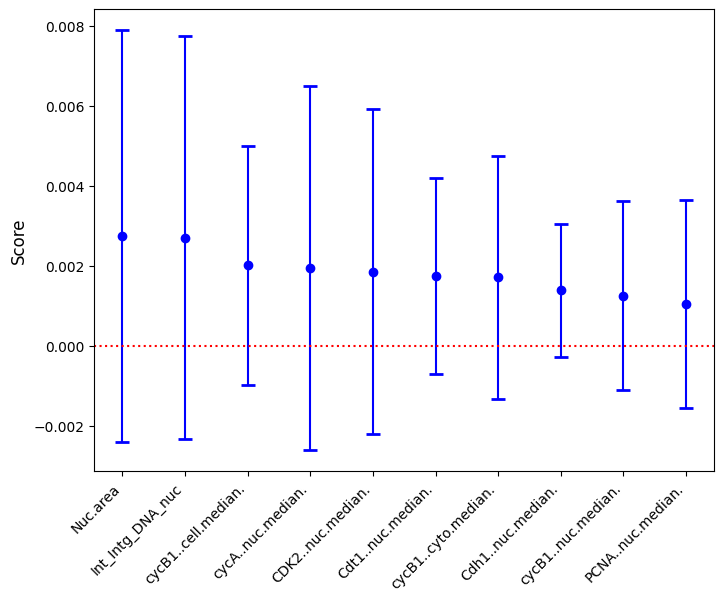

In [17]:
# Plot
plt.figure(figsize=(8, 6))
plt.errorbar(
    fig_df["feature_name"], fig_df["score"],
    yerr=[fig_df["score"] - fig_df["lower_bound"], fig_df["upper_bound"] - fig_df["score"]],
    fmt="o", capsize=5, capthick=2, markersize=6, color="b"
)
plt.axhline(y=0, color='r', linestyle='dotted')
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha = 'right')
plt.show()